In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from tensorflow.keras.models import load_model

In [3]:
start = '2013-01-01'
end = '2023-11-29'
stock = 'TSLA'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,2.333333,2.363333,2.314000,2.357333,2.357333,17922000
1,2013-01-03,2.345333,2.363333,2.316667,2.318000,2.318000,11130000
2,2013-01-04,2.320000,2.320000,2.261333,2.293333,2.293333,10110000
3,2013-01-07,2.320000,2.320000,2.260000,2.289333,2.289333,6630000
4,2013-01-08,2.300000,2.300000,2.207333,2.245333,2.245333,19260000
...,...,...,...,...,...,...,...
2741,2023-11-21,235.039993,243.619995,233.339996,241.199997,241.199997,122288000
2742,2023-11-22,242.039993,244.009995,231.399994,234.210007,234.210007,117950600
2743,2023-11-24,233.750000,238.750000,232.330002,235.449997,235.449997,65125200
2744,2023-11-27,236.889999,238.330002,232.100006,236.080002,236.080002,112031800


In [6]:
ma_100_days = data.Close.rolling(100).mean()

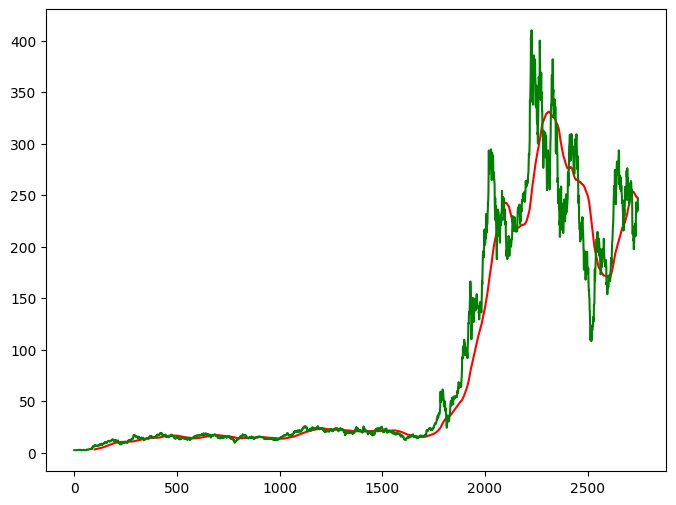

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

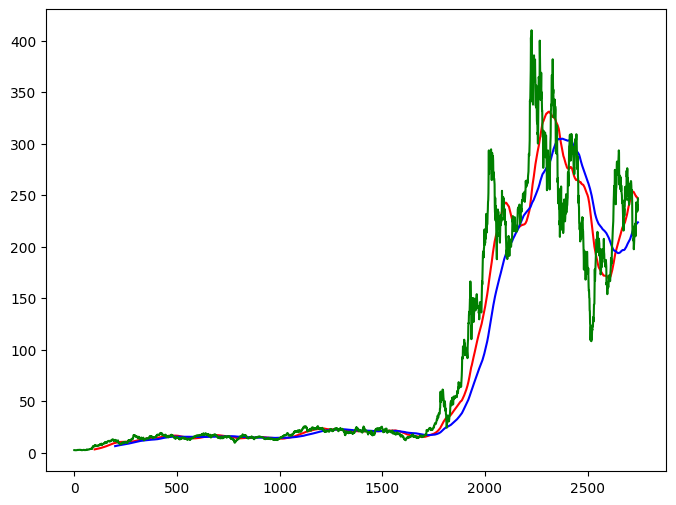

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]

2196

In [13]:
data_test.shape[0]

550

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [17]:
x, y = np.array(x), np.array(y)

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
# model = Sequential()
# model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
#                input_shape = ((x.shape[1],1))))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 60, activation='relu', return_sequences = True))
# model.add(Dropout(0.3))

# model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
# model.add(Dropout(0.4))

# model.add(LSTM(units = 120, activation = 'relu'))
# model.add(Dropout(0.5))

# model.add(Dense(units =1))

In [20]:
# model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
model=load_model('stock.keras')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
pas_100_days = data_train.tail(100)

In [24]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [25]:
data_test_scale  =  scaler.fit_transform(data_test)

In [26]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [27]:
y_predict = model.predict(x)

18/18 [==============================] - 2s 81ms/step


In [28]:
from sklearn.preprocessing import MinMaxScaler
y_predict = scaler.inverse_transform(y_predict)
y = scaler.inverse_transform(y.reshape(-1, 1))

In [29]:
print(y_predict)

[[251.38641 ]
 [251.52058 ]
 [251.62323 ]
 [251.83252 ]
 [252.2885  ]
 [252.95508 ]
 [253.76534 ]
 [254.61143 ]
 [255.40817 ]
 [256.13367 ]
 [256.7754  ]
 [257.33856 ]
 [257.8787  ]
 [258.38452 ]
 [258.869   ]
 [259.4133  ]
 [260.08347 ]
 [260.9391  ]
 [262.17108 ]
 [264.04895 ]
 [266.54688 ]
 [269.47824 ]
 [272.83157 ]
 [276.60718 ]
 [281.74344 ]
 [288.3862  ]
 [296.23618 ]
 [304.95074 ]
 [314.1967  ]
 [324.27274 ]
 [334.2245  ]
 [343.54483 ]
 [351.83252 ]
 [358.70502 ]
 [363.62637 ]
 [365.75488 ]
 [365.60526 ]
 [363.78677 ]
 [360.6544  ]
 [356.49292 ]
 [351.87674 ]
 [347.47476 ]
 [343.74808 ]
 [341.20273 ]
 [340.12704 ]
 [340.01065 ]
 [340.4364  ]
 [340.82642 ]
 [341.35995 ]
 [342.18777 ]
 [342.9071  ]
 [343.23676 ]
 [342.6174  ]
 [340.9675  ]
 [338.79422 ]
 [336.65356 ]
 [334.40054 ]
 [332.10562 ]
 [329.54272 ]
 [326.65714 ]
 [323.6669  ]
 [320.494   ]
 [317.2343  ]
 [313.84793 ]
 [310.64624 ]
 [308.43625 ]
 [308.13702 ]
 [310.20306 ]
 [314.27643 ]
 [319.53937 ]
 [324.97986 ]
 [329.

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

def calculate_rmse(y, y_pred):
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    return rmse
rmse_value = calculate_rmse(y, y_predict)
print(f'RMSE: {rmse_value}')



RMSE: 25.096159092074487


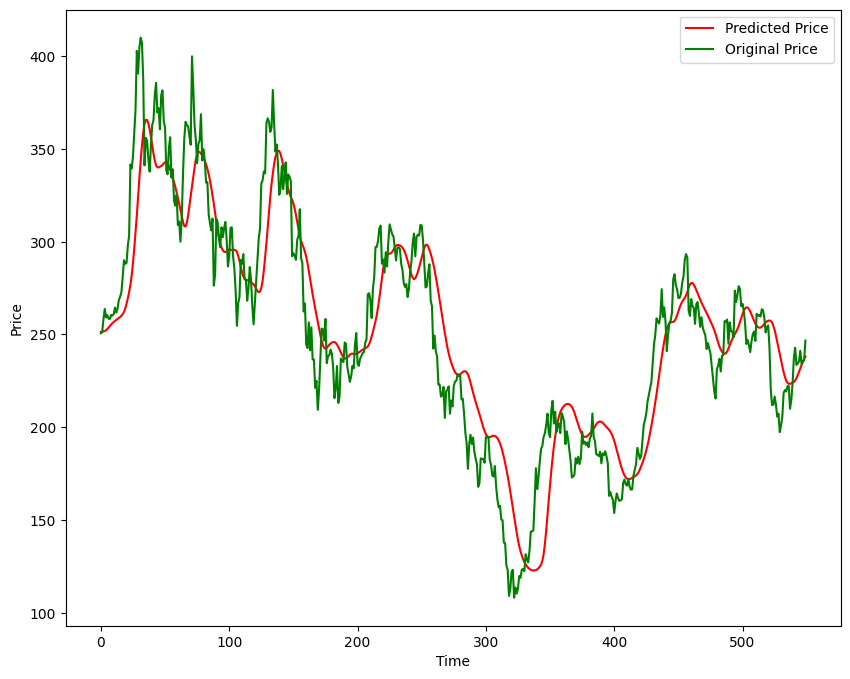

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('Stock Predictions Model.keras')